<a href="https://colab.research.google.com/github/atorras1618/Miscellaneous-TDA-notebooks/blob/main/Persistent_Homology_of_Cubical_Complexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cubical complex Persistent Homology using GUDHI

In this notebook we explore how to compute persistent homology of Cubical Complexes. We will work with an image of a rat eye where cycles seem to be of importance (Don Fox (2012) CIL:40169, Mus musculus, eye photoreceptor cell. CIL. Dataset. https://doi.org/doi:10.7295/W9CIL40169 ). 

In [16]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageOps
import requests
from io import BytesIO

In [18]:
response = requests.get('http://www.cellimagelibrary.org/pic/thumbnail_display/40169/eye+photoreceptor+cell.jpg')
img = Image.open(BytesIO(response.content))
img_grayscale = ImageOps.grayscale(img)
img_arr = np.asarray(img_grayscale)

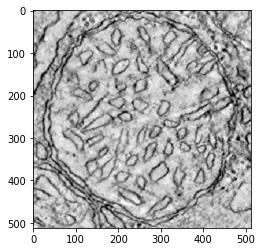

In [19]:
plt.imshow(img_arr, cmap='Greys_r')

In [20]:
np.shape(img_arr)

(512, 512)

We use the Cubical Complex from `GUDHI`. See https://gudhi.inria.fr/python/latest/cubical_complex_user.html

In [21]:
import gudhi

In [22]:
cubical_complex = gudhi.CubicalComplex(top_dimensional_cells=img_arr)

In [23]:
cub_diag = cubical_complex.persistence()

In [24]:
cub_diag[:5]

[(1, (121.0, 255.0)),
 (1, (127.0, 255.0)),
 (1, (118.0, 244.0)),
 (1, (121.0, 247.0)),
 (1, (100.0, 225.0))]

<Figure size 72x72 with 0 Axes>

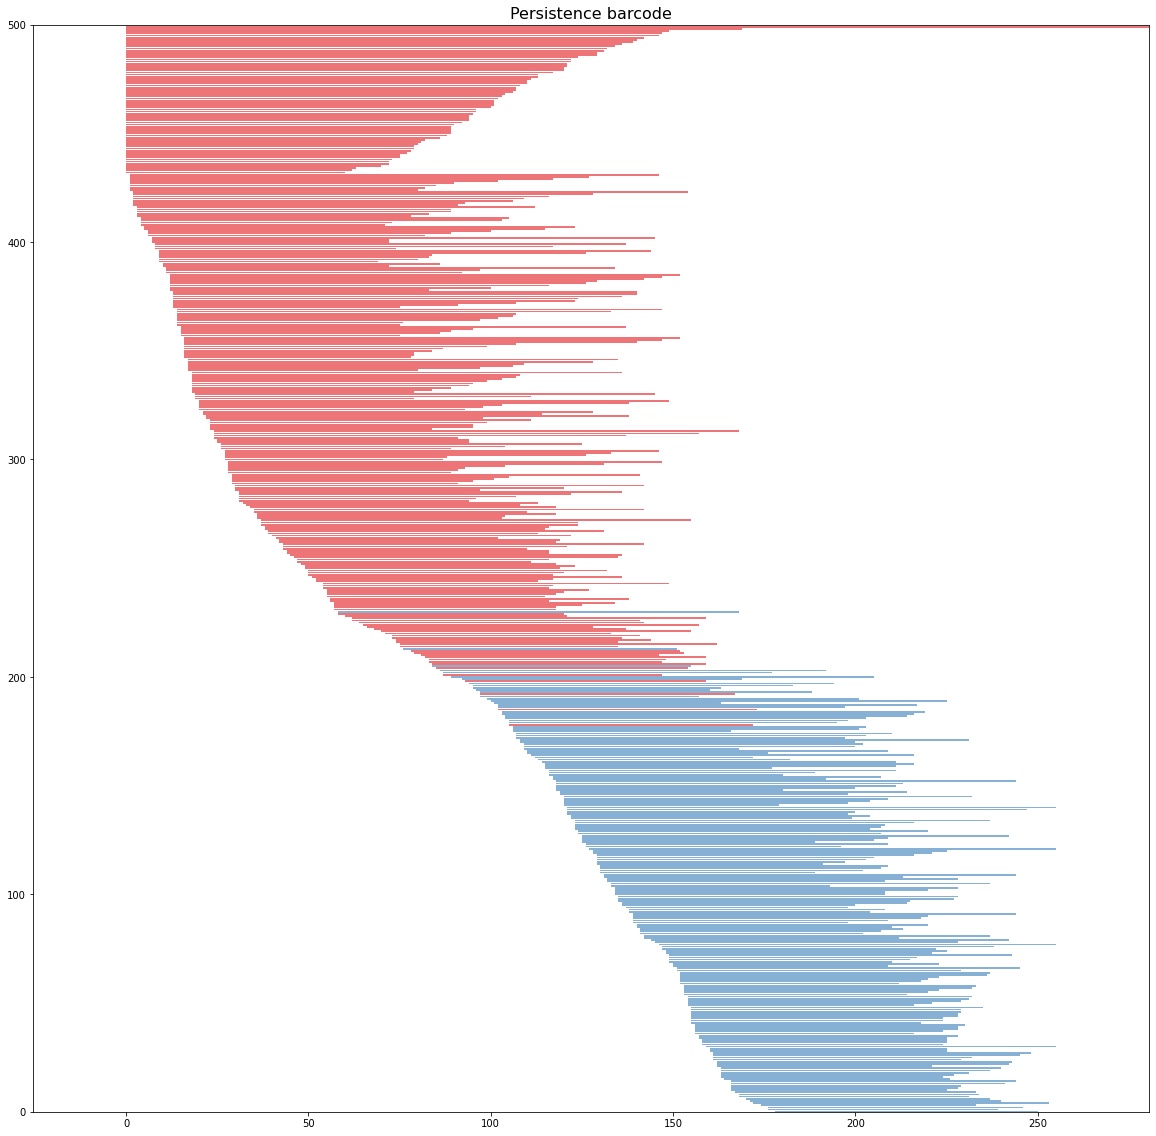

In [31]:
plt.figure(figsize=(1, 1))
gudhi.plot_persistence_barcode(cub_diag, max_intervals=500)

<Figure size 72x72 with 0 Axes>

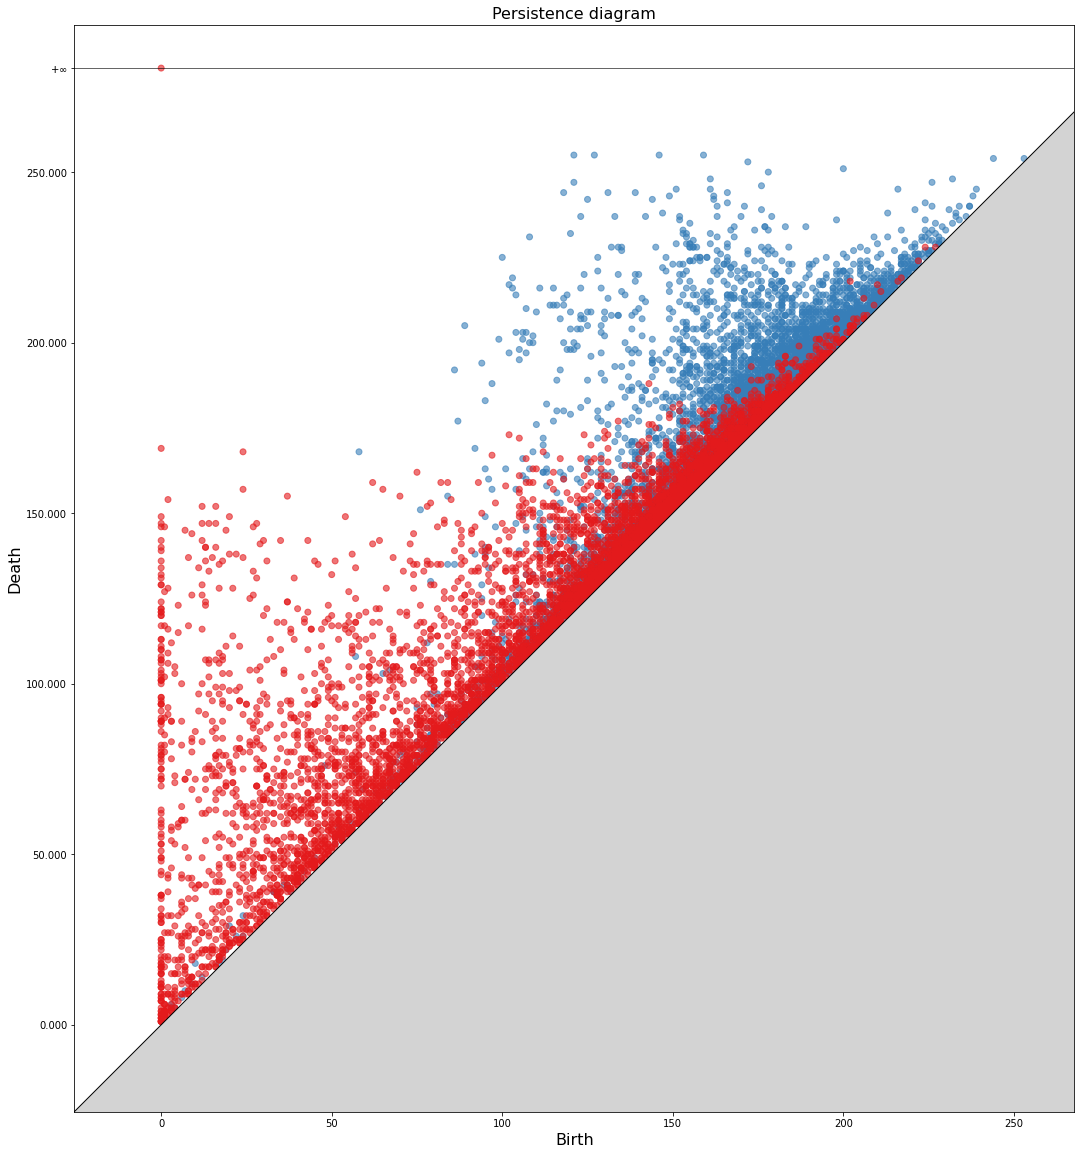

In [32]:
plt.figure(figsize=(1,1))
ax = gudhi.plot_persistence_diagram(cub_diag)
ax.set_aspect('equal')
plt.show()